In [1]:
N = (17 + 4 ) % 5 + 1
N

2

## Завдання 3

In [4]:
import pandas as pd

def get_header_name(file_name):
    file = pd.read_csv(file_name)
    return file.columns

In [5]:
get_header_name('NationalNames.csv')

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

## Завдання 4

In [7]:
import pandas as pd

def get_statistics(file_name):
    dataFrame = pd.read_csv(file_name)
    selected_cols = dataFrame[['Id', 'Year', 'Count']]
    statistics = selected_cols.describe()
    return statistics

In [8]:
get_statistics('NationalNames.csv')

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


## Завдання 5

In [10]:
import pandas as pd

def get_num_unique_names(file_name):
    dataFrame = pd.read_csv(file_name)
    return dataFrame['Name'].nunique()

In [12]:
get_num_unique_names('NationalNames.csv')

93889

## Завдання 8

In [19]:
import pandas as pd

def get_most_popular_name_by_year(file_name, year):
    dataFrame = pd.read_csv(file_name)
    data = dataFrame[dataFrame['Year'] == year]
    if data.empty:
        return None, year
    data = data.loc[data['Count'].idxmax()]
    name = data['Name']
    return name, year

In [21]:
get_most_popular_name_by_year('NationalNames.csv', 1945)

('James', 1945)

## Завдання 9

In [23]:
import pandas as pd

def get_num_records_with_min_count(file_name):
    dataFrame = pd.read_csv(file_name)
    min_count = dataFrame['Count'].min()
    result = (dataFrame['Count'] == min_count).sum()
    return result

In [26]:
get_num_records_with_min_count('NationalNames.csv')

254615

## Завдання 11

In [28]:
import pandas as pd

def get_year_with_most_unique_names(file_name):
    dataFrame = pd.read_csv(file_name)
    unique_names = dataFrame.groupby('Year')['Name'].nunique()
    year = unique_names.idxmax()
    
    name_counter = unique_names.max()
    return year, name_counter

In [30]:
get_year_with_most_unique_names('NationalNames.csv')

(2008, 32488)

## Завдання 12

In [33]:
import pandas as pd

def get_most_popular_name(file_name, year):
    dataFrame = pd.read_csv(file_name)
    data = dataFrame[dataFrame['Year'] == year]
    data = data.loc[data['Count'].idxmax()]
    name = data['Name']
    return name

In [34]:
result = get_year_with_most_unique_names('NationalNames.csv')
get_most_popular_name('NationalNames.csv', result[0])

'Jacob'

## Завдання 13

In [36]:
import pandas as pd

def find_year(file_name):
    dataFrame = pd.read_csv(file_name)
    data = dataFrame[dataFrame['Gender'] == 'F']
    data = data[data['Name'] == 'Jacob']
    data = data.loc[data['Count'].idxmax()]
    year = data['Year']
    return year

In [37]:
find_year('NationalNames.csv')

2004

## Завдання 14

In [41]:
import pandas as pd

def get_year_themost_gender_neutral_names(file_name):
    dataFrame = pd.read_csv('NationalNames.csv')
    counts = dataFrame.groupby(['Name', 'Year'])['Gender'].nunique()
    neutral_names = counts[counts == 2].reset_index()
    names_by_year = neutral_names.groupby('Year').size()
    count = names_by_year.max()
    year = names_by_year.idxmax()
    result = pd.DataFrame({year : [count]}).T
    result.columns = ['']
    result.index.name = 'Year'
    return result

In [42]:
get_year_themost_gender_neutral_names('NationalNames.csv')

,
Year,
2008,2557


## Завдання 16

In [44]:
import pandas as pd

def get_year_with_themost_children(file_name):
    dataFrame = pd.read_csv(file_name)
    num = dataFrame.groupby('Year')['Count'].sum()
    return num.idxmax(), num.max()

In [45]:
get_year_with_themost_children('NationalNames.csv')

(1957, 4200026)

## Завдання 17

In [47]:
import pandas as pd

def get_years_with_children_by_gender(file_name):
    dataFrame = pd.read_csv(file_name)
    num_male = dataFrame[dataFrame['Gender'] == 'M'].groupby('Year')['Count'].sum()
    num_female = dataFrame[dataFrame['Gender'] == 'F'].groupby('Year')['Count'].sum()
    result = pd.DataFrame({
        'F' : num_female,
        'M' : num_male
    })
    result.columns.name = 'Gender'
    return result

In [48]:
get_years_with_children_by_gender('NationalNames.csv')

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


## Завдання 18

In [52]:
import pandas as pd

def year_with_female(file_name):
    dataFrame = pd.read_csv(file_name)
    num_male = dataFrame[dataFrame['Gender'] == 'M'].groupby('Year')['Count'].sum()
    num_female = dataFrame[dataFrame['Gender'] == 'F'].groupby('Year')['Count'].sum()
    females = num_female > num_male
    year_counter = females[females].size
    return year_counter

In [53]:
year_with_female('NationalNames.csv')

54

## Завдання 19

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def build_gender_graph(file_name):
    dataFrame = pd.read_csv(file_name)
    num_male = dataFrame[dataFrame['Gender'] == 'M'].groupby('Year')['Count'].sum()
    num_female = dataFrame[dataFrame['Gender'] == 'F'].groupby('Year')['Count'].sum()
    result = pd.DataFrame({
        'F' : num_female,
        'M' : num_male
    }).fillna(0)
    result.columns.name = 'Gender'
    result[['F', 'M']].plot()
    plt.ylabel('total births per year')

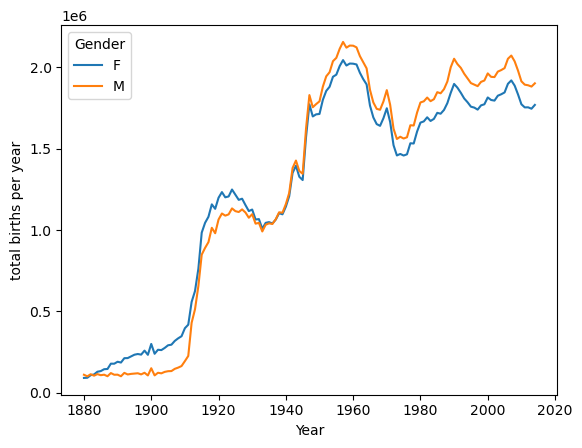

In [58]:
build_gender_graph('NationalNames.csv')

## Завдання 20

In [60]:
import pandas as pd

def number_gender_neutral_names(file_name):
    dataFrame = pd.read_csv(file_name)
    counts = dataFrame.groupby('Name')['Gender'].nunique()
    gender_counts = (counts == 2).sum()
    return gender_counts

In [61]:
number_gender_neutral_names('NationalNames.csv')

10221

## Завдання 22

In [63]:
import pandas as pd 

def years(file_name):
    dataFrame = pd.read_csv(file_name)
    years = dataFrame['Year'].nunique();
    return years

In [66]:
print(f"Спостереження проводилося {years('NationalNames.csv')} років")

Спостереження проводилося 135 років


## Завдання 23

In [68]:
import pandas as pd

def get_most_popular_neutral_names(file_name):
    dataFrame = pd.read_csv('NationalNames.csv')
    counts = dataFrame.groupby(['Name', 'Year'])['Gender'].nunique()
    neutral_names = counts[counts == 2].reset_index()
    names_year_counts = neutral_names.groupby('Name')['Year'].nunique()
    unique_years_count = dataFrame['Year'].nunique()
    names_by_every_year = names_year_counts[names_year_counts == unique_years_count]
    result = names_by_every_year.reset_index()
    return result

In [71]:
get_most_popular_neutral_names('NationalNames.csv')

,Name,Year
0,Francis,135
1,James,135
2,Jean,135
3,Jesse,135
4,Jessie,135
5,John,135
6,Johnnie,135
7,Joseph,135
8,Lee,135
9,Leslie,135


## Завдання 24

In [73]:
import pandas as pd

def get_most_popular_from_unpopular_names(file_name, threshold):
    dataFrame = pd.read_csv(file_name)
    name_counts = dataFrame.groupby('Name')['Count'].sum().reset_index()
    unpopular_names = name_counts[name_counts['Count'] < threshold]
    most_popular_unpopular_name = unpopular_names.loc[unpopular_names['Count'].idxmax()]
    print(f"Найбілше популярне з непопулярних імен - {most_popular_unpopular_name['Name']}. Ним називали {most_popular_unpopular_name['Count']} разів")

In [76]:
get_most_popular_from_unpopular_names('NationalNames.csv', 160)

Найбілше популярне з непопулярних імен - Aariel. Ним називали 159 разів


## Завдання 27

In [78]:
import pandas as pd

def get_most_popular_years_names(file_name):
    dataFrame = pd.read_csv(file_name)
    popular_names_every_year = dataFrame.loc[dataFrame.groupby('Year')['Count'].idxmax()]
    popular_names_every_year.set_index('Year', inplace=True)
    return popular_names_every_year[['Name', 'Count']]

In [80]:
get_most_popular_years_names('NationalNames.csv')

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
